# Analysis of Natural Gas Price Data

In this task, we're doing a basic analysis of natural gas prices, as well as trying to accuraterly estimate the price of  natural gas in the past and extrapolate that prediction one year into the future. 

The main is to create a function that takes a date as an input and return a price estimate

In [99]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date, timedelta
from sklearn.linear_model import LinearRegression

In [110]:
# reading the data from a local csv file

df = pd.read_csv("C:\\Users\\24493\\OneDrive\\Data Science Notes\\Personal Projects\\jpmorgan_qr\\Nat_Gas.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [101]:
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


### Data Cleaning and Manipulation

In [102]:
print(df.isnull().sum())

print(df[df.duplicated()==True])

Dates     0
Prices    0
dtype: int64
Empty DataFrame
Columns: [Dates, Prices]
Index: []


In [103]:
df['Dates'] = pd.to_datetime(df['Dates'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


### Data Visualisation

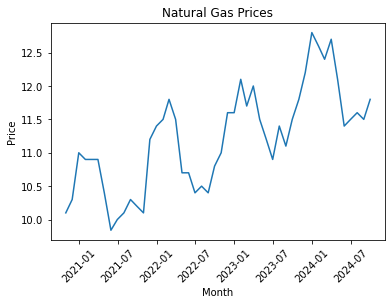

In [104]:
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')

ax.tick_params(axis='x', rotation=45)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

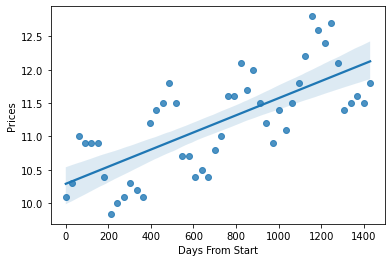

In [105]:
df['Days From Start'] = (df['Dates'] - df['Dates'].min()).dt.days

ax = sns.regplot(x="Days From Start", y="Prices", data=df)

plt.show

### Estimating Prices

In [107]:
lri = LinearRegression()

lri.fit(df[["Days From Start"]].values, df.Prices)

def model(date):
    prediction_date = pd.to_datetime(date)
    days_since_first_date = (prediction_date - df["Dates"].iloc[0]).days
    predicted_price = lri.predict([[days_since_first_date]]) 

    return print("Predicted price:", predicted_price)

In [108]:
model("2025-01-31")

Predicted price: [12.28256732]
